In [98]:
import sys
import os
import glob
import math
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FixedLocator, FixedFormatter
from IPython.display import clear_output

In [99]:
path = r'C:\Users\patri\Documents\GitHub\nlp-research\csv\TimeSeries_ngrams\TimeSeries_ngrams'                     # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
df = frame.drop(2, axis=1)
df.columns = ['Ngram', 'Title', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
df

,Ngram,Title,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,cache frame,EyeTell: Video-Assisted Touchscreen Keystroke ...,2,4,4,6,9,5,5,2,0,4
1,perspective,Understanding Linux Malware,1783017,1740408,2207081,2492036,2107046,1914562,2178134,1939018,1736575,1606433
2,right time,SoK: Keylogging Side Channels,69097,76238,90047,87544,88758,76042,74321,77305,71923,68773
3,improves performance,"FuturesMEX: Secure, Distributed Futures Market...",2096,2329,2882,2980,2345,2004,1971,1823,1866,1743
4,hardware structures,Computer Security and Privacy for Refugees in ...,145,126,234,174,133,74,133,75,73,43
...,...,...,...,...,...,...,...,...,...,...,...,...
106498,tlb,VoIP Spam Prevention,5188,5213,5595,4901,3448,3939,3074,4559,3764,2332
106499,previously proposed,A Trust Evaluation Method for Supplier Selection,2381,2542,5031,4340,2313,1925,2210,2065,2184,2024
106500,detailed comparison,Achieving Collaborative Wi-Fi Sharing without ...,4234,3143,6584,5368,3264,2778,3106,2931,2748,2365
106501,reference behavior,A Defense Security Approach for Infrastructure...,52,43,76,117,86,35,29,77,52,39


In [100]:
df_gs = pd.read_csv(r'C:\Users\patri\Documents\GitHub\nlp-research\csv\google_scholar.csv')
df_gs.drop_duplicates(subset='Title', keep='first', inplace=True)
df_gs.reset_index(drop=True, inplace=True)

fsl_labeled = pd.read_csv(r'C:\Users\patri\Documents\GitHub\nlp-research\csv\fsl_labeled_corpus.csv')

fsl_dict = {k: g['Label'].tolist() for k,g in fsl_labeled.groupby('Title')}
len(fsl_dict)
df["Label"] = df_gs["Title"].apply(lambda x: fsl_dict.get(x))

In [101]:
ts = df.dropna()
ts = ts.drop(['Ngram', 'Title'], axis=1)
ts.reset_index(drop=True, inplace=True)
ts['Label'] = ts['Label'].str[0]
ts

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Label
0,2,4,4,6,9,5,5,2,0,4,Security Technology And Implementaitons
1,1783017,1740408,2207081,2492036,2107046,1914562,2178134,1939018,1736575,1606433,Multimedia Systems
2,69097,76238,90047,87544,88758,76042,74321,77305,71923,68773,Information Security
3,2096,2329,2882,2980,2345,2004,1971,1823,1866,1743,Information Security
4,145,126,234,174,133,74,133,75,73,43,Security Technology And Implementaitons
...,...,...,...,...,...,...,...,...,...,...,...
48606,28,46,207,117,32,20,26,105,25,12,Hardware And Software Interfaces
48607,126600,124203,182662,169907,122875,99851,107759,98283,89990,78892,High-Performance Computing And Simulations
48608,872,1029,2411,1820,861,698,758,845,769,812,"Circuits, Reliability, And Fault-Tolerance"
48609,5835,6820,13926,11957,5280,4400,4757,5895,4275,4591,Very Large-Scale Integration (VLSI)


In [102]:
ts = ts.groupby(['Label']).agg('sum')
ts

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Label,,,,,,,,,,
Advanced Computing Architecture,1035844744,1038518122,1356912915,1378579611,1166239547,1022569627,1039373095,1051506199,987781405,873864263
Analogue and Mixed-Signal Circuits and Systems,268826043,271630161,357861923,359883785,299997531,259794238,264952330,262236046,245211677,222005434
Big Data Infrastructure,47021276,46838078,63202892,65142528,50976091,44741434,46903413,45495174,43502090,39692149
Big Data Learning And Analytics,99187489,102000532,132648664,134738164,117337720,101168025,101974477,106929759,102322870,89264529
Big Data Search And Mining,11303662,11101377,14821273,14629227,11927583,10316625,10510188,10089742,9571501,8446490
...,...,...,...,...,...,...,...,...,...,...
Trustworthy Machine Learning,5503,10030,13753,13169,8533,4686,7156,6996,8036,7546
Very Large-Scale Integration (VLSI),96891404,97130439,132086430,131439816,106540256,92602430,95675063,93243927,87857134,79445531
Visual Reasoning,17696388,17879910,23683085,24206503,19323582,16830801,18094102,16860843,15845970,14466286


In [103]:
ts_t = ts.transpose()

In [104]:
#ts_t = ts_t.rename(columns={ts_t.columns[0]: 'new'})
ts_t['Year'] = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
#first_col = ts_t.pop('Year')
#ts_t.insert(0, 'Year', first_col)
#ts_t.reset_index(drop=True, inplace=True)
ts_t.index.name = None
ts_t

Label,Advanced Computing Architecture,Analogue and Mixed-Signal Circuits and Systems,Big Data Infrastructure,Big Data Learning And Analytics,Big Data Search And Mining,Biometrics,Case Studies And Analysis Of Security Issues,"Circuits, Reliability, And Fault-Tolerance",Cloud And Edge Computing Technologies,Cluster Computing Algorithms And Architecture,...,System-Level Design Methodologies And High-Level Synthesis,"Test Generation, Test Architectures, Design for Test",Transfer Learning,"Trust, Security, And Privacy In Computing And Communication Methods",Trustworthy Machine Learning,Very Large-Scale Integration (VLSI),Visual Reasoning,"Web Systems, Enterprise Applications And Web Services","Wireless, Mobile, Ad-Hoc And Sensor Networks",Year
2010,1035844744,268826043,47021276,99187489,11303662,3191783,10028733,68137268,2440340,5661387,...,114602971,53539,16351920,9356364,5503,96891404,17696388,4605466,19048026,2010
2011,1038518122,271630161,46838078,102000532,11101377,3206246,9950288,68820569,2698333,5804945,...,113513325,55248,16131010,9114997,10030,97130439,17879910,4477133,18689069,2011
2012,1356912915,357861923,63202892,132648664,14821273,4148269,14262028,89628665,4016534,7340321,...,147738941,73291,23402022,12137131,13753,132086430,23683085,5395532,24766594,2012
2013,1378579611,359883785,65142528,134738164,14629227,4080659,13415363,90725596,3931632,7470346,...,151726392,70654,22604715,12772337,13169,131439816,24206503,5353843,24643207,2013
2014,1166239547,299997531,50976091,117337720,11927583,3251355,9715870,76308379,2862634,6664701,...,128291369,56497,16570152,9859694,8533,106540256,19323582,4253373,19181367,2014
2015,1022569627,259794238,44741434,101168025,10316625,2878354,8565715,66471577,2450893,5892512,...,110659387,48487,14043365,8518971,4686,92602430,16830801,3701745,16536636,2015
2016,1039373095,264952330,46903413,101974477,10510188,3012693,9354435,68137948,2697050,5962545,...,112119735,53941,15354717,8940495,7156,95675063,18094102,3916133,17505073,2016
2017,1051506199,262236046,45495174,106929759,10089742,2711201,8748786,66925496,2536899,5861032,...,112057569,50406,14175636,8259532,6996,93243927,16860843,3591568,16247924,2017
2018,987781405,245211677,43502090,102322870,9571501,2449643,8604283,62681980,2423680,5383841,...,106310619,46528,13568398,7431496,8036,87857134,15845970,3096495,15177016,2018
2019,873864263,222005434,39692149,89264529,8446490,2258804,8144288,57101050,2250717,4949346,...,96966723,43485,12239859,6848541,7546,79445531,14466286,3075041,13663934,2019


In [105]:
data_columns = ts_t.columns
data_3y_rol = ts_t[data_columns].rolling(window = 3, center = False).mean()


Label,Advanced Computing Architecture,Analogue and Mixed-Signal Circuits and Systems,Big Data Infrastructure,Big Data Learning And Analytics,Big Data Search And Mining,Biometrics,Case Studies And Analysis Of Security Issues,"Circuits, Reliability, And Fault-Tolerance",Cloud And Edge Computing Technologies,Cluster Computing Algorithms And Architecture,...,System-Level Design Methodologies And High-Level Synthesis,"Test Generation, Test Architectures, Design for Test",Transfer Learning,"Trust, Security, And Privacy In Computing And Communication Methods",Trustworthy Machine Learning,Very Large-Scale Integration (VLSI),Visual Reasoning,"Web Systems, Enterprise Applications And Web Services","Wireless, Mobile, Ad-Hoc And Sensor Networks",Year
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,1.143759e+09,2.994394e+08,5.235408e+07,1.112789e+08,1.240877e+07,3.515433e+06,1.141368e+07,7.552883e+07,3.051736e+06,6.268884e+06,...,1.252851e+08,60692.666667,1.862832e+07,1.020283e+07,9762.000000,1.087028e+08,1.975313e+07,4.826044e+06,2.083456e+07,2011.0
2013,1.258004e+09,3.297920e+08,5.839450e+07,1.231291e+08,1.351729e+07,3.811725e+06,1.254256e+07,8.305828e+07,3.548833e+06,6.871871e+06,...,1.376596e+08,66397.666667,2.071258e+07,1.134149e+07,12317.333333,1.202189e+08,2.192317e+07,5.075503e+06,2.269962e+07,2012.0
2014,1.300577e+09,3.392477e+08,5.977384e+07,1.282415e+08,1.379269e+07,3.826761e+06,1.246442e+07,8.555421e+07,3.603600e+06,7.158456e+06,...,1.425856e+08,66814.000000,2.085896e+07,1.158972e+07,11818.333333,1.233555e+08,2.240439e+07,5.000916e+06,2.286372e+07,2013.0
2015,1.189130e+09,3.065585e+08,5.362002e+07,1.177480e+08,1.229114e+07,3.403456e+06,1.056565e+07,7.783518e+07,3.081720e+06,6.675853e+06,...,1.302257e+08,58546.000000,1.773941e+07,1.038367e+07,8796.000000,1.101942e+08,2.012030e+07,4.436320e+06,2.012040e+07,2014.0
2016,1.076061e+09,2.749147e+08,4.754031e+07,1.068267e+08,1.091813e+07,3.047467e+06,9.212007e+06,7.030597e+07,2.670192e+06,6.173253e+06,...,1.170235e+08,52975.000000,1.532274e+07,9.106387e+06,6791.666667,9.827258e+07,1.808283e+07,3.957084e+06,1.774103e+07,2015.0
2017,1.037816e+09,2.623275e+08,4.571334e+07,1.033574e+08,1.030552e+07,2.867416e+06,8.889645e+06,6.717834e+07,2.561614e+06,5.905363e+06,...,1.116122e+08,50944.666667,1.452457e+07,8.572999e+06,6279.333333,9.384047e+07,1.726192e+07,3.736482e+06,1.676321e+07,2016.0
2018,1.026220e+09,2.574667e+08,4.530023e+07,1.037424e+08,1.005714e+07,2.724512e+06,8.902501e+06,6.591514e+07,2.552543e+06,5.735806e+06,...,1.101626e+08,50291.666667,1.436625e+07,8.210508e+06,7396.000000,9.225871e+07,1.693364e+07,3.534732e+06,1.631000e+07,2017.0
2019,9.710506e+08,2.431511e+08,4.289647e+07,9.950572e+07,9.369244e+06,2.473216e+06,8.499119e+06,6.223618e+07,2.403765e+06,5.398073e+06,...,1.051116e+08,46806.333333,1.332796e+07,7.513190e+06,7526.000000,8.684886e+07,1.572437e+07,3.254368e+06,1.502962e+07,2018.0


In [127]:
data_3y_rol[data_columns[1]]

2010             NaN
2011             NaN
2012    2.994394e+08
2013    3.297920e+08
2014    3.392477e+08
2015    3.065585e+08
2016    2.749147e+08
2017    2.623275e+08
2018    2.574667e+08
2019    2.431511e+08
Name: Analogue and Mixed-Signal Circuits and Systems, dtype: float64

In [134]:
label = 7
data_3y_rol[data_columns[label]]

2010             NaN
2011             NaN
2012    7.552883e+07
2013    8.305828e+07
2014    8.555421e+07
2015    7.783518e+07
2016    7.030597e+07
2017    6.717834e+07
2018    6.591514e+07
2019    6.223618e+07
Name: Circuits, Reliability, And Fault-Tolerance, dtype: float64

<ipython-input-183-74ba272cf25a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


Text(0.5, 1.0, 'Trends in Ethics, Privacy, And Trust')

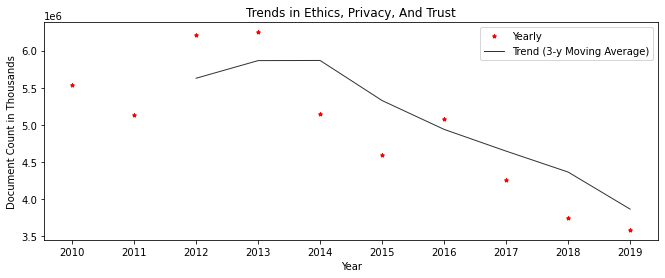

In [183]:
label =25
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

data_columns = ts_t.columns
data_3y_rol = ts_t[data_columns].rolling(window = 3, center = False).mean()

x_formatter = FixedFormatter(years)
x_locator = FixedLocator([0, 10])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
fig, ax = plt.subplots(figsize = (11,4))# plotting daily data
ax.plot(ts_t[data_columns[label]], marker='*', markersize=4, color='red',linestyle='None', label='Yearly')# plotting 7-day rolling data
#ax.plot(data_3y_rol[data_columns[label]], linewidth=5, label='3-y Moving Average')# plotting annual rolling data
ax.plot(data_3y_rol[data_columns[label]], color='0.2', linewidth=1, label='Trend (3-y Moving Average)')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Document Count in Thousands')
ax.set_title('Trends in '+ data_columns[label])

<ipython-input-128-011d6b95f888>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


Text(0.5, 1.0, 'Trends in Analogue and Mixed-Signal Circuits and Systems')

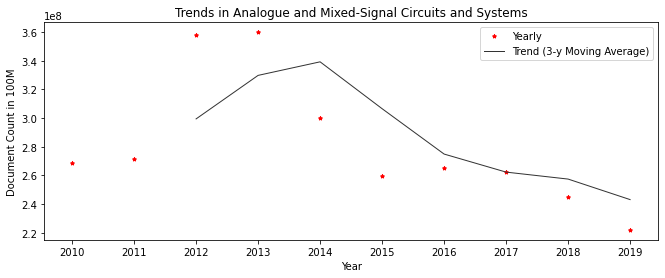

In [128]:
label = 4
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

data_columns = ts_t.columns
data_3y_rol = ts_t[data_columns].rolling(window = 3, center = False).mean()

x_formatter = FixedFormatter(years)
x_locator = FixedLocator([0, 10])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
fig, ax = plt.subplots(figsize = (11,4))# plotting daily data
ax.plot(ts_t[data_columns[1]], marker='*', markersize=4, color='red',linestyle='None', label='Yearly')# plotting 7-day rolling data
#ax.plot(data_3y_rol[data_columns[label]], linewidth=5, label='3-y Moving Average')# plotting annual rolling data
ax.plot(data_3y_rol[data_columns[1]], color='0.2', linewidth=1, label='Trend (3-y Moving Average)')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Document Count in 100M')
ax.set_title('Trends in '+ data_columns[1])